<a href="https://colab.research.google.com/github/pikaybh/SNU-Ambient-AI/blob/main/HW_2023_22785_ByungHeeYoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# | HW2(~1/13) | Inception Network 구현

[Inception network](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Szegedy_Going_Deeper_With_2015_CVPR_paper.pdf)는 Inception module 여러개로 구성된 모델이다. 다음 그림을 참고하여 Inception network를 구현하시오.

- **채점 기준**
  - Inception module을 잘 구현해야 한다.
  - 아래의 표에 있는 대로 architecture를 구현해야 한다. (논문과 약간 다르게 auxiliary classifier 등이 생략되어 있다)
  - 아래의 **표에 있는 대로 hyperparameter(filter size, stride, filter 수)를 설정**해야 하고, 각 layer 및 module의 **output size가 표와 같게 나와야 한다.**
  - test accuracy가 **65% 이상** 나와야 한다.
- **제출**
  - "HW2_학번_이름.ipynb" 형태로 저장하여 Jupyter Notebook을 그대로 제출.
    - 예: HW2_2022_12345_keondo.ipynb
  - output 지우지 말아 주세요

## 과제 설명

### Inception Module

- `strides`는 모두 1로 설정해야 output size가 맞게 나올 것이다.



<img src="https://user-images.githubusercontent.com/37704174/108797724-369ef800-75cf-11eb-987a-926657daf61e.JPG" width="400" height="400"/>  



### Inception Network Architecture
- 아래의 표에 있는대로 구성을 하면 이러한 구조의 모델이 만들어진다.

<img src="https://user-images.githubusercontent.com/37704174/108797713-2dae2680-75cf-11eb-8593-5a1bf50549da.png" width="400" height="400"/>  

### Specification


<img src="https://user-images.githubusercontent.com/37704174/109782740-8d9a7200-7c4c-11eb-9999-d859b67dc468.JPG" width="600" height="600"/>  

- 이 표에 있는 대로 위에서부터 layer 및 Inception module을 쌓아야 한다.
- 모든 `Conv2D`와 `MaxPool2D`의 padding 옵션은 `same`으로 설정해야 output size가 올바르게 나올 것이다.
- 표 3행을 보면 convolution의 depth가 2이다. 이것은 `Conv2D` layer가 2개 있다는 뜻이고, 각각의 filter의 수는 64, 192로 설정해야 한다.
- Inception module의 hyperparameter 설명
  - #1x1: 맨 왼쪽 1x1 convolution layer의 filter 수
  - #3x3 reduce: 3x3 convolution layer 이전에 나오는 1x1 convolution layer의 filter 수
  - #3x3: 3x3 convolution layer의 filter 수
  - #5x5 reduce: 5x5 convolution layer 이전에 나오는 1x1 convolution layer의 filter 수
  - #5x5: 5x5 convolution layer의 filter 수
  - pool proj: max pooling 다음에 나오는 1x1 convolution layer의 filter 수

## (Optional) Colab Setup

In [48]:
# Colab에 Google Drive를 마운트하면 노트북의 모든 코드가 Google Drive의 모든 파일에 액세스할 수 있게 됨
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
"""
Change directory to where this file is located
"""
%cd '/content/drive/MyDrive/[2023|01] Ambient AI/1주차/HW2'

/content/drive/MyDrive/[2023|01] Ambient AI/1주차/HW2


## Import Modules

In [50]:
import tensorflow as tf
### 자유롭게 import
from tensorflow.keras.layers import Input, Dense, Conv2D, Concatenate, Flatten, Add, MaxPooling2D, GlobalAveragePooling2D
import tensorflow.keras.datasets.cifar10 as cifar10
import os
import matplotlib.pyplot as plt
from sklearn import model_selection

In [51]:
print(tf.__version__)

2.9.2


## GPU Setting

In [52]:
# Select GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [53]:
"""
Make sure your runtime type is GPU!
"""
physical_devices = tf.config.list_physical_devices('GPU')
print('Num_GPUs:{}, List:{}'.format(len(physical_devices), physical_devices))

Num_GPUs:1, List:[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 1. Implement Inception Network


### Inception Module

In [54]:
def InceptionModule(inputs, f_1x1, f_3x3_r, f_3x3, f_5x5_r, f_5x5, f_pool):
  """
  inputs: input of Inception module
  f_ : number of filters in the table above
  
  """
  ### Q1. Make a Inception Module (as Figure 2) ###
  x_1 = Conv2D(filters = f_1x1, kernel_size=(1, 1), padding='same', activation='relu')(inputs)

  x_2 = Conv2D(filters = f_3x3_r, kernel_size=(1, 1), padding='same', activation='relu')(inputs)
  x_2 = Conv2D(filters = f_3x3, kernel_size=(3, 3), padding='same', activation='relu')(x_2)
  
  x_3 = Conv2D(filters = f_5x5_r, kernel_size=(1, 1), padding='same', activation='relu')(inputs)
  x_3 = Conv2D(filters = f_5x5, kernel_size=(5, 5), padding='same', activation='relu')(x_3)

  x_4 = MaxPooling2D(pool_size=(1, 1))(inputs)
  x_4 = Conv2D(filters = f_pool, kernel_size=(1, 1), padding='same', activation='relu')(x_4)
  
  outputs = Concatenate()([x_1, x_2, x_3, x_4])  # use tf.keras.layers.concatenate
  
  #######################################
  return outputs

### Inception Network

In [55]:
def InceptionNet():
  inputs = tf.keras.layers.Input(shape=(32, 32, 3))
  
  ### Q2. Make a Inception Network according to the above specification ###
  x = Conv2D(filters = 64, kernel_size=(7, 7), strides=1, padding='same')(inputs)
  x = MaxPooling2D(pool_size=(32, 32), strides=2, padding='same')(x)

  x = Conv2D(filters = 192, kernel_size=(3, 3), strides=1, padding='same')(x)
  x = MaxPooling2D(pool_size=(8, 8), strides=2, padding='same')(x)

  x = InceptionModule(x, 64, 96, 128, 16, 32, 32)
  x = InceptionModule(x, 128, 128, 192, 32, 96, 64)

  x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

  x = InceptionModule(x, 192, 96, 208, 16, 48, 64)
  x = InceptionModule(x, 160, 112, 224, 24, 64, 64)
  x = InceptionModule(x, 128, 128, 256, 24, 64, 64)
  x = InceptionModule(x, 112, 144, 288, 32, 64, 64)
  x = InceptionModule(x, 256, 160, 320, 32, 128, 128)

  x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
  
  x = InceptionModule(x, 256, 160, 320, 32, 128, 128)
  x = InceptionModule(x, 384, 192, 384, 48, 128, 128)

  x = GlobalAveragePooling2D()(x)  # 1024

  x = Dense(10, activation='linear')(x)

  outputs = Dense(10, activation='softmax')(x)
  
  #########################################################################
  
  return tf.keras.Model(inputs=inputs, outputs=outputs)

In [56]:
my_inception = InceptionNet()

### Model Summary

아래 셀을 실행 했을 때, 표의 각각에 해당하는 output size가 맞게 나와야 한다.

In [57]:
my_inception.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_130 (Conv2D)            (None, 32, 32, 64)   9472        ['input_15[0][0]']               
                                                                                                  
 max_pooling2d_17 (MaxPooling2D  (None, 16, 16, 64)  0           ['conv2d_130[0][0]']             
 )                                                                                                
                                                                                                  
 conv2d_131 (Conv2D)            (None, 16, 16, 192)  110784      ['max_pooling2d_17[0][0]'] 

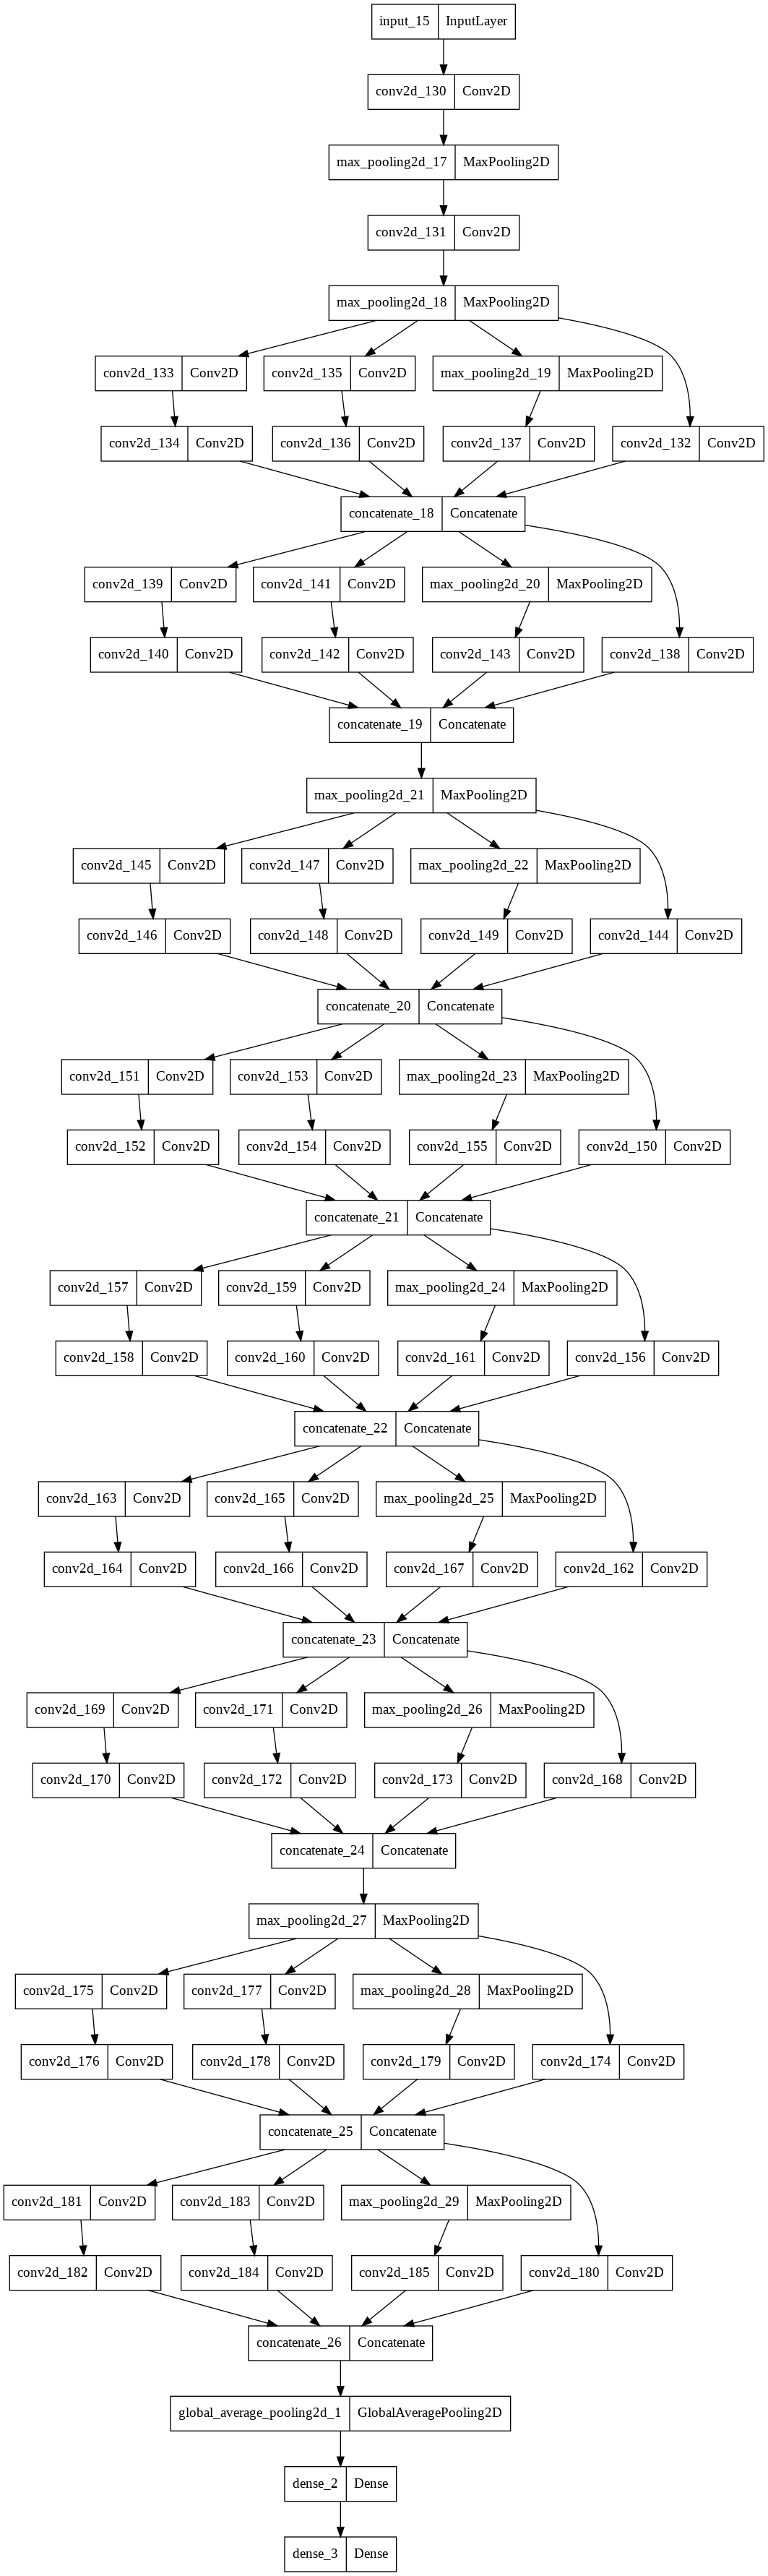

In [58]:
tf.keras.utils.plot_model(my_inception, to_file='inception.png')

## 2. Dataset

### Training Data

아래의 데이터를 이용한다.

In [59]:
### DO NOT MODIFY ###

#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split train set into train/valid set
from sklearn import model_selection
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.1)

### Data Preprocessing

원하는 대로 데이터를 전처리 해주면 된다.

In [60]:
## Q3. Data preprocessing (ex. normalize...) ##

x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
###############################################

## 3. Training

### Model Compile

Optimizer, Loss function을 알맞게 설정한다. <br>
Callbacks도 자유롭게 사용한다.

In [61]:
## Q4. Model compile ##
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optim_fn = tf.keras.optimizers.Adam(lr = 0.001)

my_inception.compile(optimizer = optim_fn,
                     loss = loss_fn,
                     metrics = ["accuracy"])
#######################

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Model Training

hyperparameter를 적절히 설정한다. (epochs 등..)

In [71]:
## Q5. Set hyperparameters & training ##
hist = my_inception.fit(x=x_train, 
                        y=y_train, 
                        epochs = 100, 
                        validation_data=(x_valid, y_valid)
                        # your hyperparameters...
                        )
########################################

Epoch 1/100
1407/1407 [==============================] - 39s 28ms/step - loss: 1.0529 - accuracy: 0.6268 - val_loss: 1.3257 - val_accuracy: 0.5526
Epoch 2/100
1407/1407 [==============================] - 40s 28ms/step - loss: 1.0356 - accuracy: 0.6346 - val_loss: 1.1401 - val_accuracy: 0.5968
Epoch 3/100
1407/1407 [==============================] - 40s 28ms/step - loss: 1.0108 - accuracy: 0.6406 - val_loss: 1.1806 - val_accuracy: 0.5894
Epoch 4/100
1407/1407 [==============================] - 42s 30ms/step - loss: 0.9922 - accuracy: 0.6492 - val_loss: 1.1294 - val_accuracy: 0.6074
Epoch 5/100
1407/1407 [==============================] - 40s 28ms/step - loss: 0.9710 - accuracy: 0.6527 - val_loss: 1.1198 - val_accuracy: 0.5988
Epoch 6/100
1407/1407 [==============================] - 39s 28ms/step - loss: 0.9740 - accuracy: 0.6570 - val_loss: 1.1524 - val_accuracy: 0.6038
Epoch 7/100
1407/1407 [==============================] - 39s 28ms/step - loss: 0.9460 - accuracy: 0.6660 - val_loss: 1

## 참고 >

조교가 학습한 모델의 validation accuracy를 그래프로 나타내 보았다.

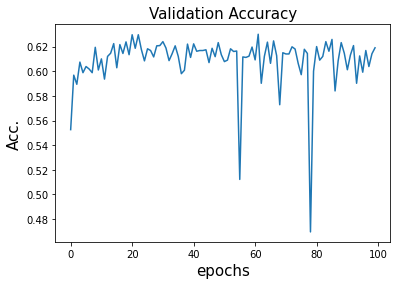

In [72]:
import matplotlib.pyplot as plt

plt.plot(hist.history['val_accuracy'])
plt.title('Validation Accuracy', fontsize=15)
plt.xlabel('epochs', fontsize=15)
plt.ylabel('Acc.', fontsize=15)

plt.show()

## Test Accuracy

Test accuracy 측정 결과 **65% 이상**이 나와야 한다.

In [73]:
### DO NOT MODIFY ###
my_inception.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.7908 - accuracy: 0.6118


[1.7907941341400146, 0.6118000149726868]